# Time-Series Prediction Using Long Short-Term Memory (LSTM) Networks

### Building the Model and Comparing Against the Test Set

In [1]:
import numpy as np
import datetime
import pandas as pd
from pandas import read_csv

import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow.python.keras import backend as k


import warnings
warnings.filterwarnings("ignore")

series = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


Using TensorFlow backend.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [3]:
data= series.loc['Z8RsBpxhnkebK5fvahVCmfV7icO2']
data = data.reset_index(drop=True)


data

,time,valueHR,valuesteps,WkHR,WkCal,WkSteps,sec,sugarValue,cal,carbs,fat,fiber,protein,sodium
0,2019-12-16 00:15:00,72.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-16 00:30:00,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-12-16 00:45:00,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-12-16 01:00:00,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-16 01:15:00,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,2020-01-23 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,102.35376,NaN,NaN,NaN,NaN,NaN,NaN
2095,2020-01-23 21:15:00,NaN,NaN,NaN,NaN,NaN,NaN,102.76200,NaN,NaN,NaN,NaN,NaN,NaN
2096,2020-01-23 21:30:00,NaN,NaN,NaN,NaN,NaN,NaN,108.47736,NaN,NaN,NaN,NaN,NaN,NaN
2097,2020-01-23 21:45:00,NaN,NaN,NaN,NaN,NaN,NaN,105.51762,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data = data.loc[:,['time','sugarValue']]
data = data.drop(data[data.sugarValue > 300].index, inplace=False)

data =data.dropna()

In [5]:

df=data
# Convert to numeric
df['sugarValue'] = pd.to_numeric(df['sugarValue'])

# Ensure the data is sorted
df.sort_values('time', inplace=True, ascending=True)

# Set the Datetime column as the index
df['time']=pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')
df.set_index('time', inplace=True)

df.head()

,sugarValue
time,
2020-01-09 12:00:00,90.82098
2020-01-09 12:15:00,90.61686
2020-01-09 12:30:00,86.22828
2020-01-09 12:45:00,82.04382
2020-01-09 13:00:00,79.90056


## Now we have a dataset with index (time data) and in a column the values of sugar from CMG.

### I split the data in two part - train and test set.

In [6]:
train, test = df[:-96], df[-96:]

In [7]:
train.size

1111

In [8]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

## From here, we can create and fit our model.


In [9]:
n_input = 96
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=100)

In [10]:
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.4))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [11]:
import time
start_time = time.time()



model.fit_generator(generator,epochs=500)

print("--- %s seconds ---" % (time.time() - start_time))


Epoch 1/500
11/11 [==============================] - 3s 287ms/step - loss: 0.0682
Epoch 2/500
11/11 [==============================] - 3s 251ms/step - loss: 0.0161
Epoch 3/500
11/11 [==============================] - 3s 254ms/step - loss: 0.0139
Epoch 4/500
11/11 [==============================] - 3s 244ms/step - loss: 0.0120
Epoch 5/500
11/11 [==============================] - 3s 247ms/step - loss: 0.0126
Epoch 6/500
11/11 [==============================] - 3s 245ms/step - loss: 0.0121
Epoch 7/500
11/11 [==============================] - 3s 249ms/step - loss: 0.0121
Epoch 8/500
11/11 [==============================] - 3s 234ms/step - loss: 0.0124
Epoch 9/500
11/11 [==============================] - 3s 235ms/step - loss: 0.0125
Epoch 10/500
11/11 [==============================] - 3s 242ms/step - loss: 0.0112
Epoch 11/500
11/11 [==============================] - 3s 246ms/step - loss: 0.0115
Epoch 12/500
11/11 [==============================] - 3s 237ms/step - loss: 0.0114
Epoch 13/500


11/11 [==============================] - 3s 251ms/step - loss: 0.0062
Epoch 197/500
11/11 [==============================] - 3s 249ms/step - loss: 0.0064
Epoch 198/500
11/11 [==============================] - 3s 241ms/step - loss: 0.0062
Epoch 199/500
11/11 [==============================] - 3s 246ms/step - loss: 0.0059
Epoch 200/500
11/11 [==============================] - 3s 249ms/step - loss: 0.0061
Epoch 201/500
11/11 [==============================] - 3s 251ms/step - loss: 0.0060
Epoch 202/500
11/11 [==============================] - 3s 246ms/step - loss: 0.0060
Epoch 203/500
11/11 [==============================] - 3s 242ms/step - loss: 0.0062
Epoch 204/500
11/11 [==============================] - 3s 250ms/step - loss: 0.0061
Epoch 205/500
11/11 [==============================] - 3s 244ms/step - loss: 0.0059
Epoch 206/500
11/11 [==============================] - 3s 245ms/step - loss: 0.0057
Epoch 207/500
11/11 [==============================] - 3s 245ms/step - loss: 0.0060
Epoch 

11/11 [==============================] - 3s 232ms/step - loss: 0.0048
Epoch 391/500
11/11 [==============================] - 3s 235ms/step - loss: 0.0049
Epoch 392/500
11/11 [==============================] - 3s 239ms/step - loss: 0.0049
Epoch 393/500
11/11 [==============================] - 3s 236ms/step - loss: 0.0049
Epoch 394/500
11/11 [==============================] - 3s 232ms/step - loss: 0.0050
Epoch 395/500
11/11 [==============================] - 3s 239ms/step - loss: 0.0050
Epoch 396/500
11/11 [==============================] - 3s 237ms/step - loss: 0.0048
Epoch 397/500
11/11 [==============================] - 3s 237ms/step - loss: 0.0049
Epoch 398/500
11/11 [==============================] - 3s 235ms/step - loss: 0.0049
Epoch 399/500
11/11 [==============================] - 3s 238ms/step - loss: 0.0049
Epoch 400/500
11/11 [==============================] - 3s 242ms/step - loss: 0.0048
Epoch 401/500
11/11 [==============================] - 3s 237ms/step - loss: 0.0048
Epoch 

In [12]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [13]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=df[-n_input:].index, columns=['Prediction'])

df_test = pd.concat([df,df_predict], axis=1)

### I plot the predictions against the actuals values.

No handles with labels found to put in legend.


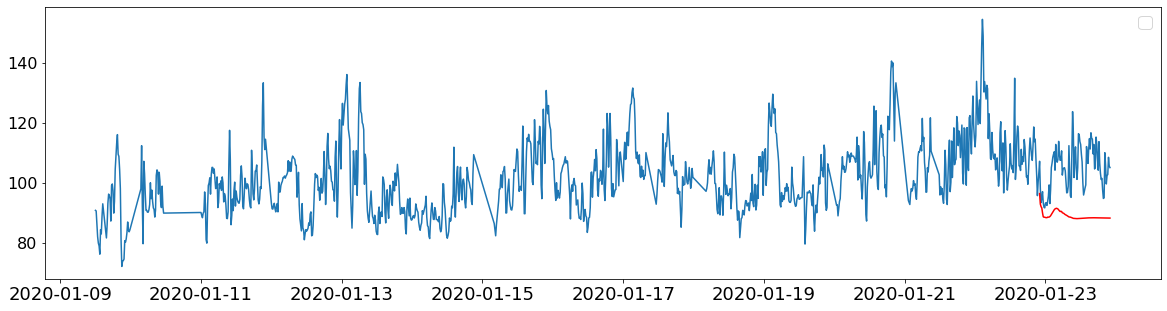

In [14]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['sugarValue'])
plt.plot(df_test.index, df_test['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

## Calculate the root mean square error

In [15]:
pred_actual_rmse = rmse(df_test.iloc[-n_input:, [0]], df_test.iloc[-n_input:, [1]])
print("rmse: ", pred_actual_rmse)

rmse:  [17.36947115]


# Now let's try to predict future values

In [19]:
train = df

In [20]:
scaler.fit(train)
train = scaler.transform(train)

In [21]:
n_input = 96
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=100)

In [22]:
model.fit_generator(generator,epochs=500)

Epoch 1/500
12/12 [==============================] - 3s 244ms/step - loss: 0.0047
Epoch 2/500
12/12 [==============================] - 3s 231ms/step - loss: 0.0047
Epoch 3/500
12/12 [==============================] - 3s 238ms/step - loss: 0.0046
Epoch 4/500
12/12 [==============================] - 3s 231ms/step - loss: 0.0047
Epoch 5/500
12/12 [==============================] - 3s 236ms/step - loss: 0.0044
Epoch 6/500
12/12 [==============================] - 3s 234ms/step - loss: 0.0047
Epoch 7/500
12/12 [==============================] - 3s 233ms/step - loss: 0.0051
Epoch 8/500
12/12 [==============================] - 3s 227ms/step - loss: 0.0047
Epoch 9/500
12/12 [==============================] - 3s 230ms/step - loss: 0.0048
Epoch 10/500
12/12 [==============================] - 3s 232ms/step - loss: 0.0046
Epoch 11/500
12/12 [==============================] - 3s 237ms/step - loss: 0.0047
Epoch 12/500
12/12 [==============================] - 3s 245ms/step - loss: 0.0048
Epoch 13/500


12/12 [==============================] - 3s 252ms/step - loss: 0.0036
Epoch 197/500
12/12 [==============================] - 3s 213ms/step - loss: 0.0038
Epoch 198/500
12/12 [==============================] - 3s 237ms/step - loss: 0.0038
Epoch 199/500
12/12 [==============================] - 3s 284ms/step - loss: 0.0040
Epoch 200/500
12/12 [==============================] - 3s 225ms/step - loss: 0.0039
Epoch 201/500
12/12 [==============================] - 2s 207ms/step - loss: 0.0038
Epoch 202/500
12/12 [==============================] - 3s 214ms/step - loss: 0.0037
Epoch 203/500
12/12 [==============================] - 3s 233ms/step - loss: 0.0037
Epoch 204/500
12/12 [==============================] - 2s 205ms/step - loss: 0.0038
Epoch 205/500
12/12 [==============================] - 3s 213ms/step - loss: 0.0037
Epoch 206/500
12/12 [==============================] - 2s 198ms/step - loss: 0.0037
Epoch 207/500
12/12 [==============================] - 2s 188ms/step - loss: 0.0035
Epoch 

12/12 [==============================] - 2s 196ms/step - loss: 0.0037
Epoch 391/500
12/12 [==============================] - 2s 208ms/step - loss: 0.0037
Epoch 392/500
12/12 [==============================] - 2s 189ms/step - loss: 0.0035
Epoch 393/500
12/12 [==============================] - 2s 203ms/step - loss: 0.0032
Epoch 394/500
12/12 [==============================] - 2s 203ms/step - loss: 0.0030
Epoch 395/500
12/12 [==============================] - 2s 200ms/step - loss: 0.0031
Epoch 396/500
12/12 [==============================] - 2s 180ms/step - loss: 0.0030
Epoch 397/500
12/12 [==============================] - 2s 207ms/step - loss: 0.0031
Epoch 398/500
12/12 [==============================] - 2s 206ms/step - loss: 0.0028
Epoch 399/500
12/12 [==============================] - 2s 178ms/step - loss: 0.0028
Epoch 400/500
12/12 [==============================] - 2s 206ms/step - loss: 0.0029
Epoch 401/500
12/12 [==============================] - 2s 186ms/step - loss: 0.0030
Epoch 

In [23]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [24]:
#from pandas.tseries.offsets import DateOffset
#add_dates = [df.index[-1] + DateOffset(days=x) for x in range(0,13) ]
#future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)

lDay= df.tail(1).index.date.item()
lDay= pd.to_datetime(lDay, format='%Y-%m-%d %H:%M:%S')

lDay = lDay + datetime.timedelta(minutes= 1425)


date_list = [lDay + datetime.timedelta(minutes=15*x) for x in range(0, 97)]

datatext=[x.strftime('%Y-%m-%d %H:%M:%S') for x in date_list]

future_dates = pd.DataFrame(index=datatext[1:],columns=df.columns)


In [25]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-n_input:].index, columns=['Prediction'])

#df_predict= df_predict.reset_index()
#df_predict= df_predict.set_index(['index'], inplace=False)


df_proj = pd.concat([df,df_predict])

## I plot the graph of the current values with the predicted values added

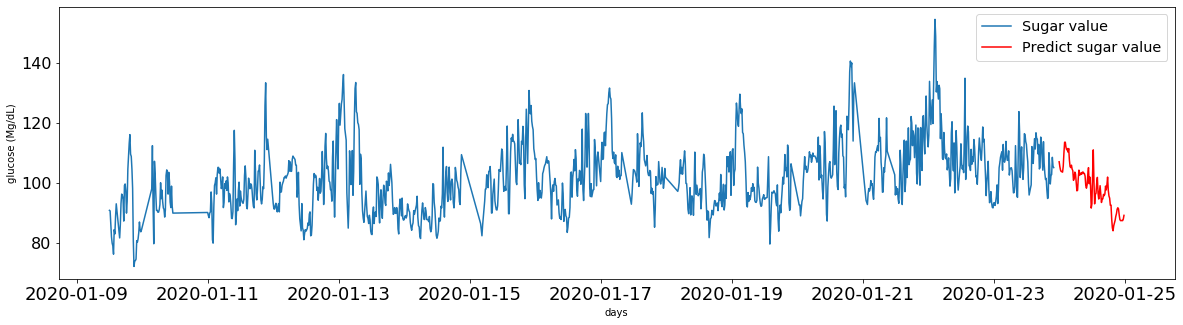

In [39]:
plt.figure(figsize=(20, 5))
plt.plot(df_proj.index, df_proj['sugarValue'] , label= "Sugar value")
plt.plot(df_proj.index, df_proj['Prediction'], label= "Predict sugar value", color='r')
plt.legend(loc='best', fontsize='x-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.xlabel("days")
plt.ylabel("glucose (Mg/dL)")

plt.show()

## Output values predicted for the next day

### This dataframe show all values for the next day(24/01) from 00 am to 23.45 pm.


In [28]:
df_predict

,Prediction
2020-01-24 00:00:00,107.000189
2020-01-24 00:15:00,105.378917
2020-01-24 00:30:00,104.202997
2020-01-24 00:45:00,103.736244
2020-01-24 01:00:00,103.720687
...,...
2020-01-24 22:45:00,87.389674
2020-01-24 23:00:00,87.466139
2020-01-24 23:15:00,87.387980
2020-01-24 23:30:00,87.890505
